# Australian Automotive Market - Descriptive Analysis

In [1]:
# data

import pandas as pd
import numpy as np
from scipy.stats import variation 

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

We are going to analise the Australian Automotive Market with data extracted from the website Autotrader.com. The dataset's author doesn't provide the information about when this data was extracted.

We will try to answer these questions:

1. What are the top 10 veicles sold?
2. What's the avarage mileage of these cars?
3. What's the avarage price of these cars?
4. 


## 1. Reading, visualising and describing the dataset

In [2]:
df = pd.read_csv('/content/cars.csv')

df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


<center> <b> Column meaning </b> </center>

---

**ID:** Vehicle number.

**Name:** Vehicle name.

**Price:** The price of the car.

**Brand:** The brand of the vehicle.

**Model:** Vehicle age.

**Variant:** Vehicle variant.

**Series:** Series of vehicles.

**Year:** Year of manufacture.

**Kilometers:** The number of kilometers the vehicle can run (new vehicles have this attribute 0).

**Type:** Vehicle type (Sedan, Wagon, Coupe,…).

**Gearbox:** Gearbox (Automatic, manual,…).

**Fuel:** Fuel (Oil, gasoline,…).

**Status:** Status (Used, tested,…).

**CC:** Segmentation.

**Color:** Car color.

**Seating Capacity:** Number of seats.

---

In [3]:
df.shape

(17048, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [5]:
df.loc[:,['Price', 'Year', 'Kilometers']].corr()

,Price,Year,Kilometers
Price,1.000000,0.488033,-0.447490
Year,0.488033,1.000000,-0.728515
Kilometers,-0.447490,-0.728515,1.000000


Text(0.5, 1.0, 'Confusion Matrix')

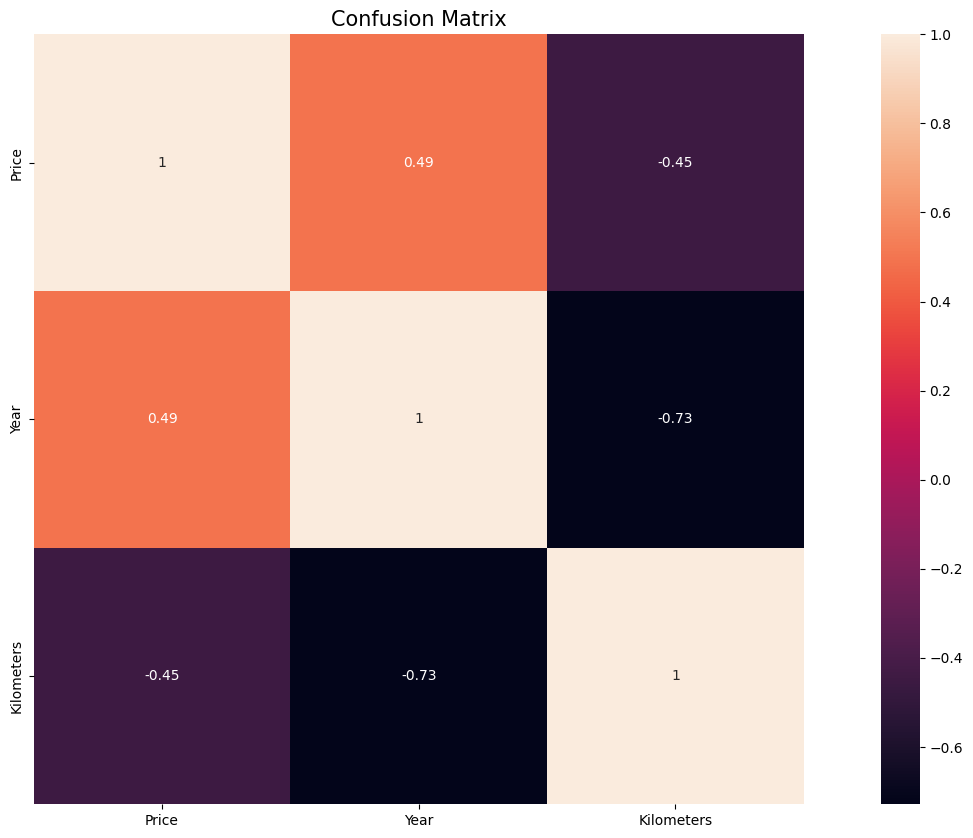

In [6]:
fig, axs = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.loc[:,['Price', 'Year', 'Kilometers']].corr(), square=True, annot=True)
plt.title('Confusion Matrix', fontsize=15)

**Observations:** we can get some interesting insights here:


1.   **Price x Year:** as expected, there's a positive correlation between Price and Year, which means that the newer the car is, the more expensive it tends to be. Although, this correlation is considered weak since it's lower than 0.5.
2.   **Price x Kilometers:** one more expected correlation, although it's not as high as expected. The more kilometers run, the lower the price, however, this is another weak correlation, since it's lower than 0.5.
3. **Kilometers x Year:** this negative correlation is the strongest among the others, and again, expected. The older the car, the more kilometers it has run.



In [7]:
# let's describe just the columns important to us, that is Price, Kilometers and Year

df.loc[:,['Price', 'Year', 'Kilometers']].describe().applymap(lambda x: f"{x:0.5f}")

,Price,Year,Kilometers
count,17048.00000,17048.00000,17048.00000
mean,36777.77804,2015.48129,103231.40169
std,30305.01533,4.72159,80413.13148
min,1000.00000,1989.00000,1.00000
25%,18800.00000,2013.00000,44502.25000
50%,29990.00000,2016.00000,88454.00000
75%,45990.00000,2019.00000,148873.50000
max,999000.00000,2022.00000,2700000.00000


We can see that the Standard Deviation in Price and Kilometers are very high, which can indicate that we may have outliers in this dataset that may affect our analysis.

In order to check out, we're going to take a closer look at the:

1. Median: if the mean is distant from the median, we can have a better understanding of the dataset. If the mean is higher, it means that the top values a more distant from the centre of the distribution. If the mean is lower than the median, it means that the bottom values are more distant than the top values
2. Coefficient of Variation: to analyze the degree of dispersion of a data set

In [8]:
# median

df.loc[:,['Price', 'Year', 'Kilometers']].median()

Price         29990.0
Year           2016.0
Kilometers    88454.0
dtype: float64

In [9]:
# Coefficient of Variation

variation(df.loc[:,['Price', 'Year', 'Kilometers']])

array([0.82397926, 0.00234259, 0.77893714])

We can see that the mean is greater than the median, which means that we have numbers at the top of the dataset pulling the mean higher, causing anomalies in the results and getting in the way of the analysis.

In addition, the coefficient of variation is extremely high, reinforcing what was shown in the comparison between the mean and median, which means that we have a high variability in the data.

Let's see the data in a boxplot to better visualise it.

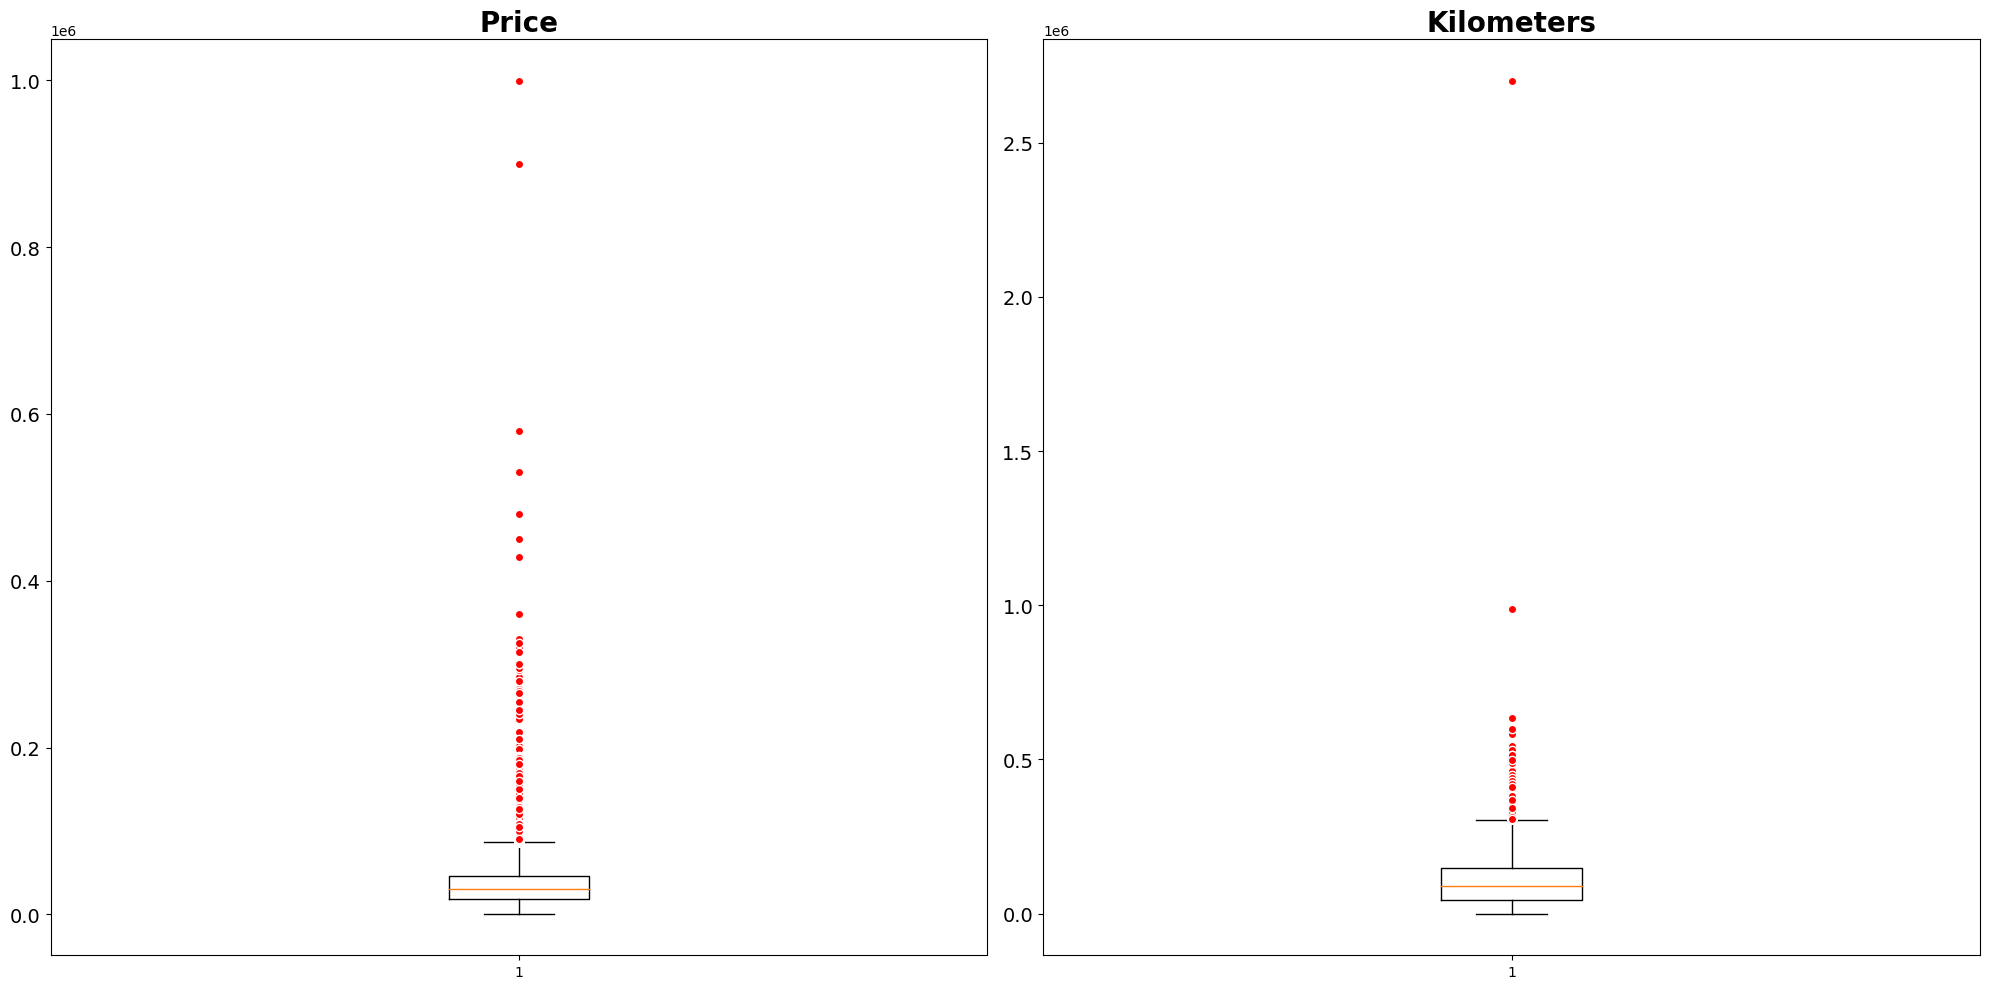

In [10]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fix, axs = plt.subplots(1,2, figsize=(20,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.loc[:,['Price', 'Kilometers']].iloc[:,i], flierprops=red_circle)
  ax.set_title(df.loc[:,['Price', 'Kilometers']].columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

Taking into account that the scale is in a million, we have cars with a price of almost a million and cars that have run more than 2 million kilometres. 

Would this be really true? 2 million kilometres seems a lot for a car to run.

We will check it after and see if it seems really right. If it's not, we will take it off and filter properly the dataset.

First, since we are looking for the used cars, we will filter them and analyse them separated.

## 2. Used cars

As I am looking for the used cars, let's create another dataframe just with the used cars to see if we have differences in the analysis done before.

In [11]:
UsedCars = df.copy()

UsedCars = UsedCars[UsedCars['Status'] == 'Used']

UsedCars

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity


For some reason, it didn't work. Let's investigate to see what can be the problem.

In [12]:
UsedCars = df.copy()

UsedCars.Status[0]

' Used'

Now we can see what is the problem, there's a space before the word "Used", so it's not filtering properly.

We will have to strip all the existing spaces to ensure the filter works correctly.

In [13]:
UsedCars = df.copy()

UsedCars.Status = UsedCars.Status.str.strip()

UsedCars.Status[0]

'Used'

Now we can begin our analysis:

In [14]:
UsedCars = UsedCars[UsedCars['Status'] == 'Used']

UsedCars

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,12366036,2017 Nissan X-Trail ST (4WD) T32 Series 2,26800,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5
6,12370057,2016 Ford Territory TX (rwd) SZ MK2,23990,Ford,Territory,TX (rwd),SZ MK2,2016,154136,Wagon,Automatic,Diesel,Used,2720,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


In [15]:
UsedCars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16304 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                16304 non-null  int64 
 1   Name              16304 non-null  object
 2   Price             16304 non-null  int64 
 3   Brand             16304 non-null  object
 4   Model             16304 non-null  object
 5   Variant           16304 non-null  object
 6   Series            16304 non-null  object
 7   Year              16304 non-null  int64 
 8   Kilometers        16304 non-null  int64 
 9   Type              16304 non-null  object
 10  Gearbox           16304 non-null  object
 11  Fuel              16304 non-null  object
 12  Status            16304 non-null  object
 13  CC                16304 non-null  int64 
 14  Color             16304 non-null  object
 15  Seating Capacity  16304 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [16]:
UsedCars.loc[:,['Price', 'Year', 'Kilometers']].describe().applymap(lambda x: f"{x:0.5f}")

,Price,Year,Kilometers
count,16304.00000,16304.00000,16304.00000
mean,35638.70725,2015.19492,107796.91198
std,29747.38417,4.61934,79181.72872
min,1000.00000,1989.00000,5.00000
25%,17990.00000,2013.00000,50585.25000
50%,29888.00000,2016.00000,92488.50000
75%,44405.00000,2018.00000,152000.00000
max,999000.00000,2022.00000,2700000.00000


In [17]:
# Median

UsedCars.loc[:, ['Price', 'Year', 'Kilometers']].median()

Price         29888.0
Year           2016.0
Kilometers    92488.5
dtype: float64

In [18]:
# Coefficient of Variation

variation(UsedCars.loc[:,['Price', 'Year', 'Kilometers']])

array([0.83466753, 0.00229219, 0.7345229 ])

The numbers decreased a little bit but didn't cause any major effects, even because the number of used cars represent the majority of the data set.

The Coefficient of Variation of the Price increased a little while the Kilometers decreased.

Before filtering, there were 17048 cars and after filtering the number is 16304, a porcentage of:

In [19]:
(UsedCars.ID.count()/df.ID.count()*100).round(2)

95.64

In [20]:
UsedCars.loc[:,['Price', 'Year', 'Kilometers']].corr()

,Price,Year,Kilometers
Price,1.000000,0.474708,-0.431873
Year,0.474708,1.000000,-0.705814
Kilometers,-0.431873,-0.705814,1.000000


**Observation:** The correlation among the used cars decreased in all cases

## 3. Questions

### 3.1. What are the top 10 veicles sold?

Since my budget is up to $5.000, I will analyse either the number of sold cars with no limitation on budget and with limitation on budget.

#### 3.1.1. With no budget limitation

In [21]:
# with no limitation

UsedCars.groupby(['Brand','Model'])['ID'].size().nlargest(10)

Brand       Model    
Ford        Ranger       648
Toyota      Hilux        539
Holden      Commodore    491
Mitsubishi  Triton       362
Toyota      Corolla      355
            RAV4         307
Nissan      Navara       298
Holden      Colorado     279
Nissan      X-Trail      272
Mazda       3            271
Name: ID, dtype: int64

In [ ]:
# Let's visualise these 10 cars in a bar chart

# getting all brands and models to filter the data set
brands = [x[0] for x in UsedCars.groupby(['Brand','Model'])['ID'].size().nlargest(10).index]
models = [x[1] for x in UsedCars.groupby(['Brand','Model'])['ID'].size().nlargest(10).index]

# creating a variable with the dataframe filtered
Top10_NoLimit = UsedCars[(UsedCars['Brand'].isin(brands)) & (UsedCars['Model'].isin(models))]

PlotDF = Top10_NoLimit

# creating a new colunm with the brand and model together
PlotDF['Brand_Model'] = PlotDF[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
PlotDF = PlotDF[['Brand_Model', 'Year']]

# grouping the dataset and adding a colunm with the amount of cars per brand/model and Year
PlotDF = PlotDF.groupby(['Brand_Model', 'Year']).size().reset_index(name='Count')

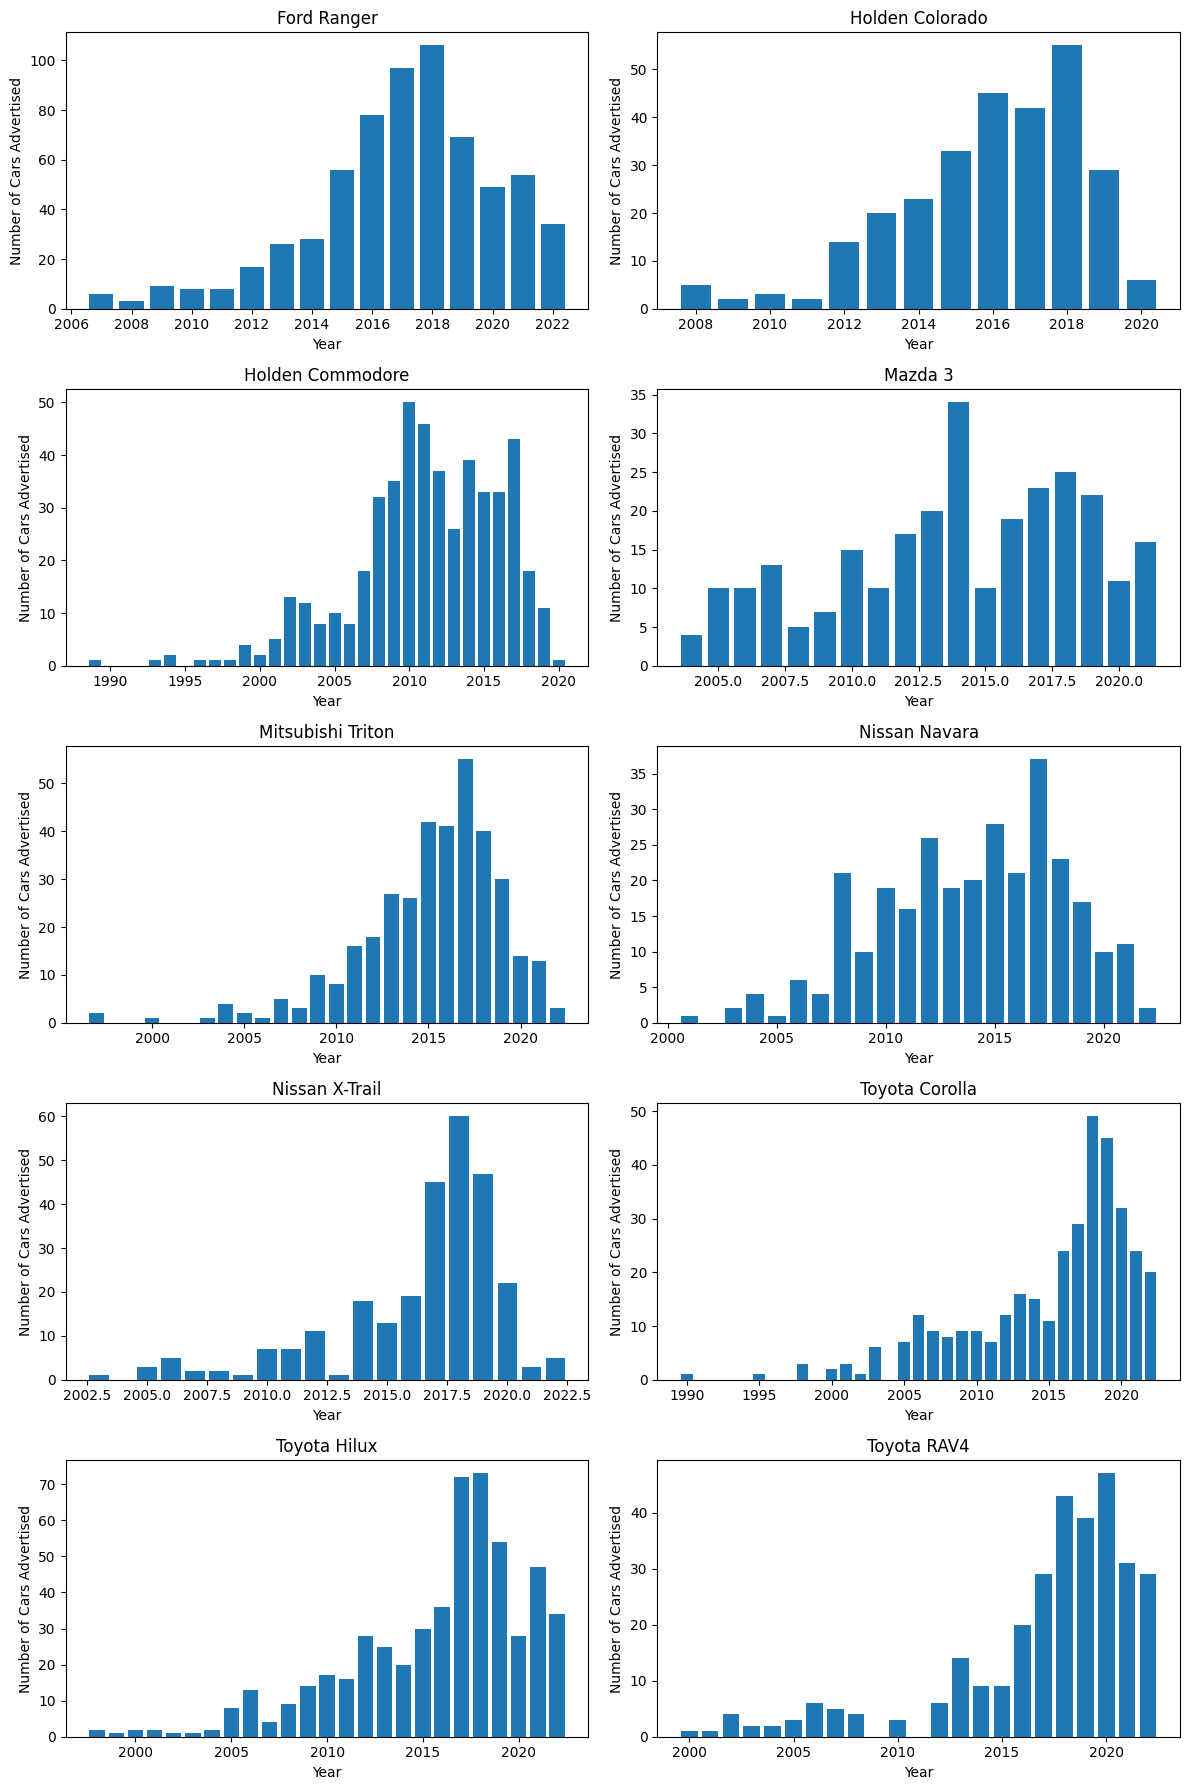

In [89]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(PlotDF['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = PlotDF[PlotDF['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Count'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Number of Cars Advertised')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### 3.1.2. With budget limitation

In [24]:
# with limitation

UsedCars[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10)

Brand       Model    
Holden      Commodore    22
Toyota      Camry        11
            Corolla      11
Ford        Falcon       10
Mitsubishi  Lancer       10
Mazda       3             9
Nissan      Pulsar        9
Holden      Astra         8
Ford        Focus         7
Honda       Civic         7
dtype: int64

In [ ]:
# Let's visualise these 10 cars in a bar chart

# getting all brands and models to filter the data set
brands2 = [x[0] for x in UsedCars[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]
models2 = [x[1] for x in UsedCars[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]

# creating a variable with the dataframe filtered
Top10_Limit = UsedCars[(UsedCars['Brand'].isin(brands2)) & (UsedCars['Model'].isin(models2))]

PlotDF2 = Top10_Limit

# creating a new colunm with the brand and model together
PlotDF2['Brand_Model'] = PlotDF2[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
PlotDF2 = PlotDF2[['Brand_Model', 'Year']]

# grouping the dataset and adding a colunm with the amount of cars per brand/model and Year
PlotDF2 = PlotDF2.groupby(['Brand_Model', 'Year']).size().reset_index(name='Count')

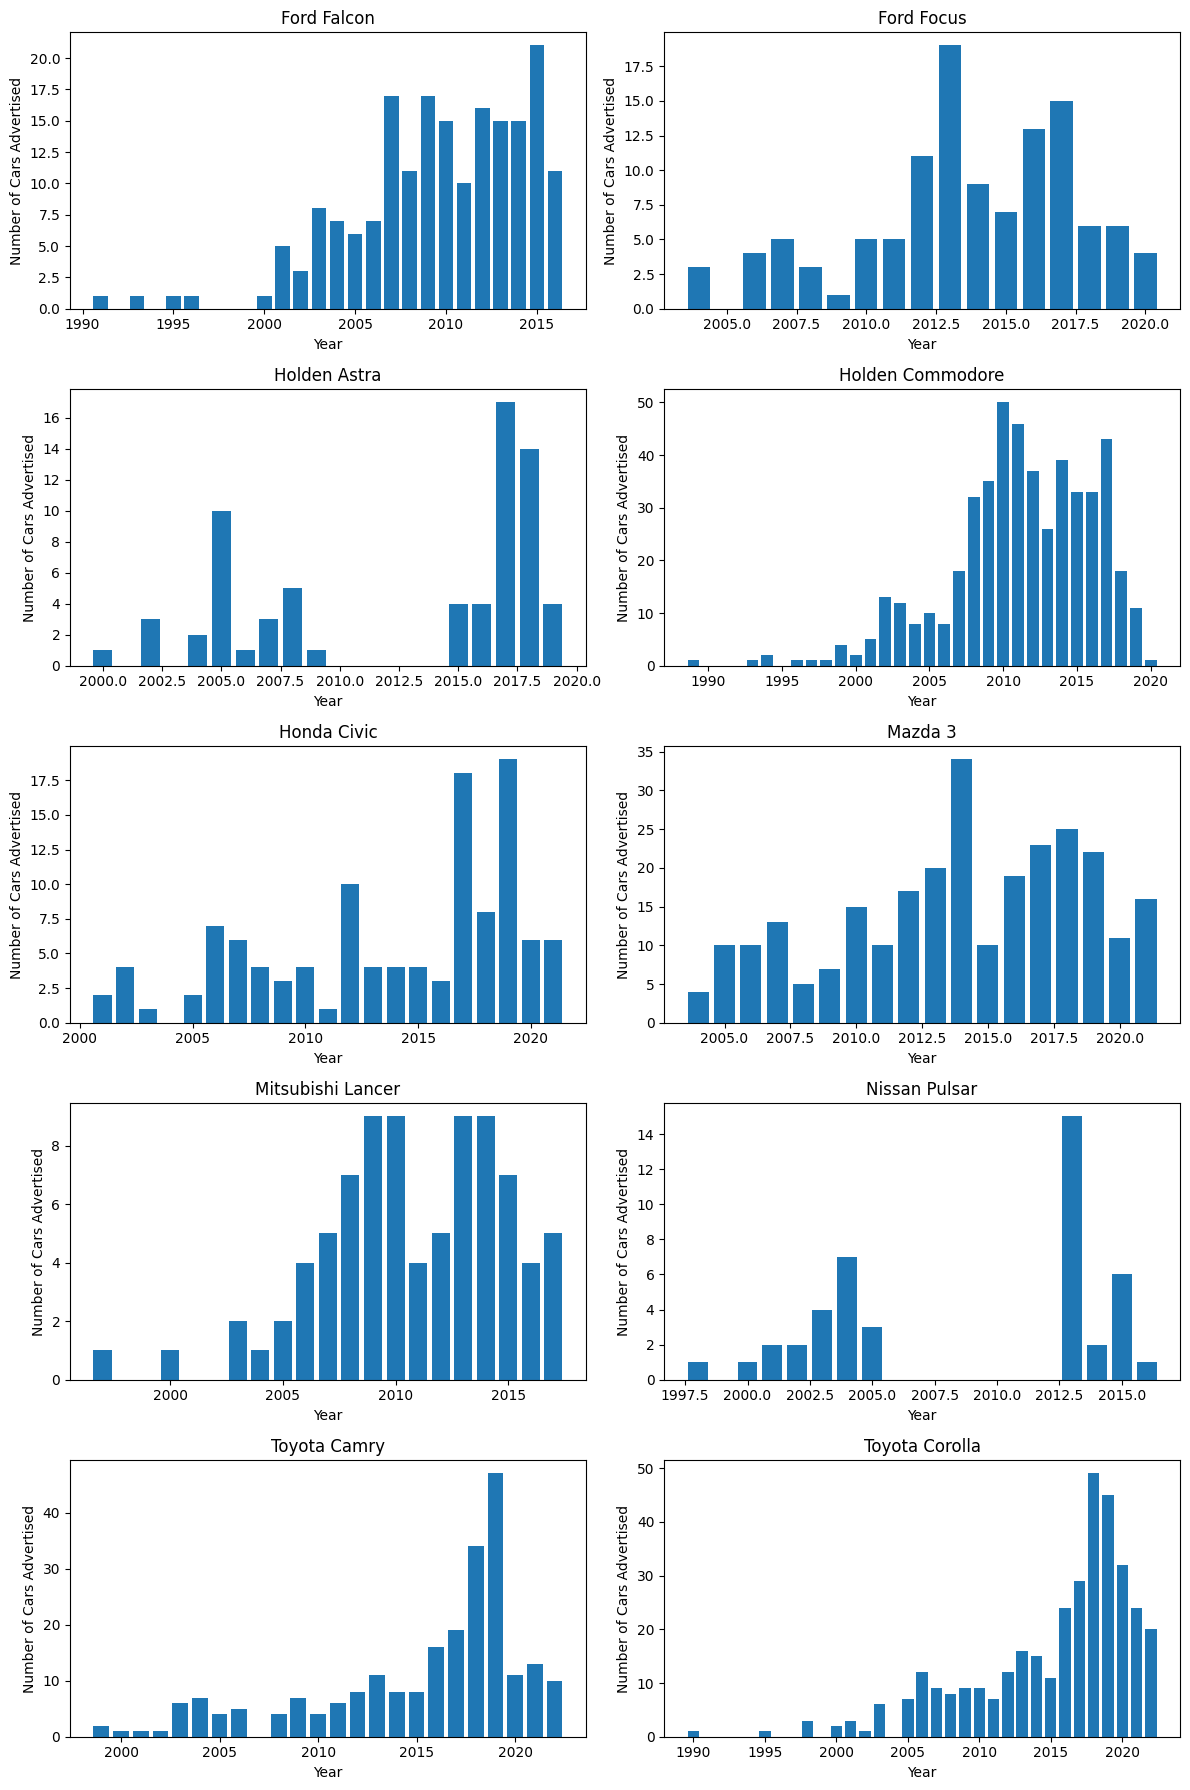

In [88]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(PlotDF2['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = PlotDF2[PlotDF2['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Count'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Number of Cars Advertised')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### 3.2. What's the avarage mileage of these cars?

For this one we will analyse the whole dataset but also the dataser without the outliers to see how the outliers influence our analyses.

#### 3.2.1. With no budget limitation

Without the limit of $5000, which is my budget to buy a car.

##### 3.2.1.1. With outliers

Taking into account the outliers we saw at the beginning of our analysis.

<ipython-input-84-ce35221bda83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AverageMi['Brand_Model'] = AverageMi[['Brand', 'Model']].apply(' '.join, axis=1)


<Axes: ylabel='Brand_Model'>

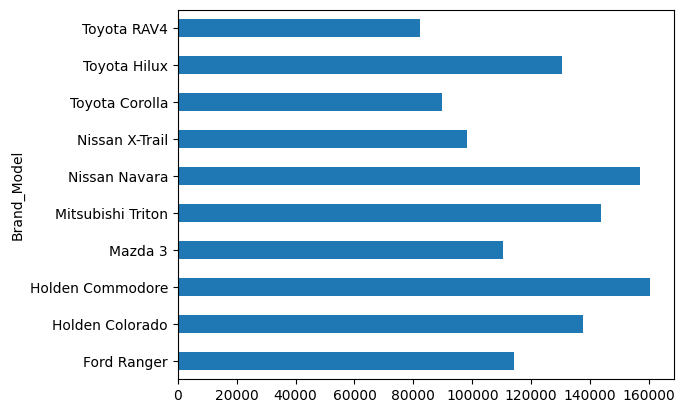

In [84]:
# creatting the dataframe with the 10 most advertised cars with no budget limitation
AverageMi = Top10_NoLimit

# creating a new colunm with the brand and model together
AverageMi['Brand_Model'] = AverageMi[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
AverageMi = AverageMi.loc[:, ['Brand_Model', 'Kilometers']]

# grouping the dataset with the average kilometers per brand/model
AverageMi = AverageMi.groupby('Brand_Model')['Kilometers'].mean().round(2)

AverageMi.plot(kind='barh')

In [ ]:
# creatting the dataframe with the 10 most advertised cars
AverageMi2 = Top10_NoLimit

# creating a new colunm with the brand and model together
AverageMi2['Brand_Model'] = AverageMi2[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
AverageMi2 = AverageMi2.loc[:, ['Brand_Model', 'Year', 'Kilometers']]

# grouping the dataset and adding a colunm with the average kilometers per brand/model and Year
AverageMi2 = AverageMi2.groupby(['Brand_Model', 'Year'])['Kilometers'].mean().round(2).reset_index(name='Average_Mileage')

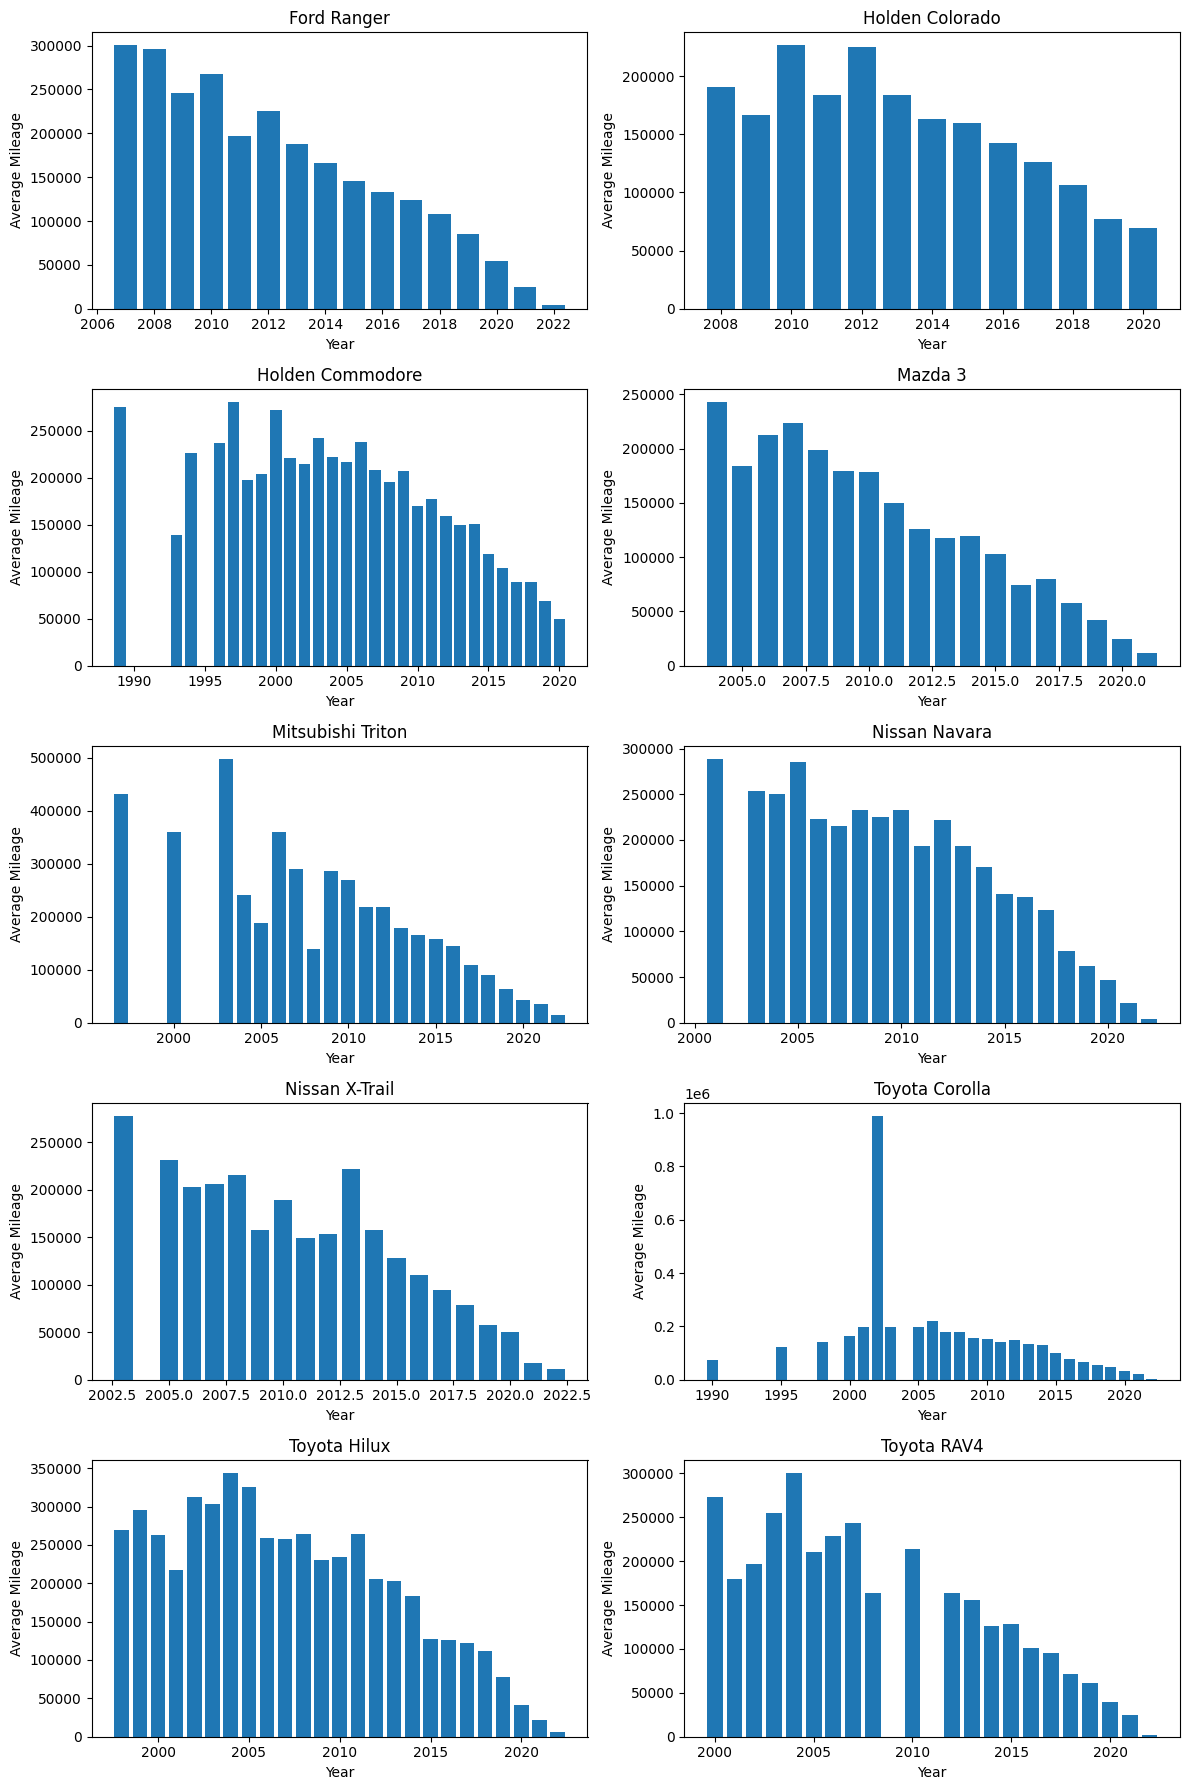

In [79]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(AverageMi2['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = AverageMi2[AverageMi2['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Average_Mileage'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Average Mileage')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 3.2.1.2 Without outliers

Excluding the outliers we saw at the beginning of our analysis.